In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

# Regression

In [4]:
f_3order = lambda x, a, b, c, d: a*x**3 + b*x**2 + c*x + d

In [5]:
real_coef = [4, 0.85, -1.5, 0]

x_data = np.random.rand(100)*2 - 1
y_data = f_3order(x_data, *real_coef) + 0.05*np.arcsin(np.random.rand(100)*2 - 1) + 0.1*np.random.normal(0, np.sqrt(50),size=100)

In [6]:
x_fit = np.linspace(-1, 1, 1000)
coef_fit, _ = opt.curve_fit(f_3order, x_data, y_data)
y_fit = f_3order(x_fit, *coef_fit)

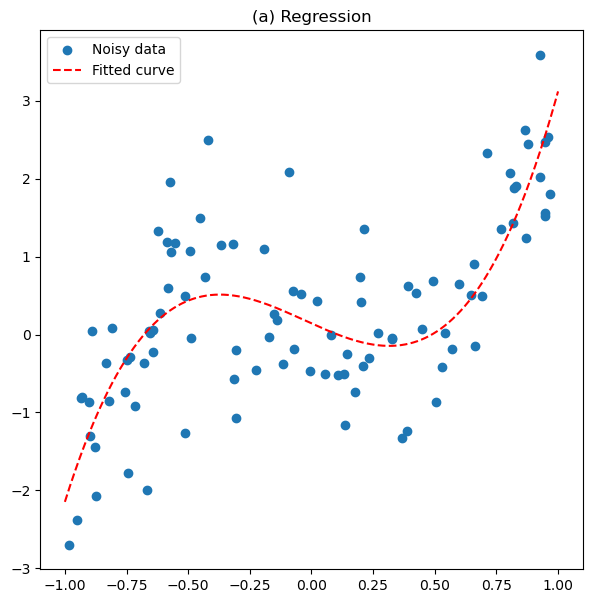

In [7]:
plt.figure(figsize=(7, 7))
plt.scatter(x_data, y_data, label='Noisy data')
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Fitted curve')
plt.title('(a) Regression')
plt.legend()

# Classification

In [8]:
x_cluster, y_cluster = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42, cluster_std=0.45, center_box=(-1, 1))
clf = LinearSVC(random_state=42)
clf.fit(x_cluster, y_cluster)

LinearSVC(random_state=42)

In [9]:
custom_cmap = matplotlib.colors.ListedColormap(["C0", "C1", "C2"]) 

Text(0.5, 1.0, '(b) Classification')

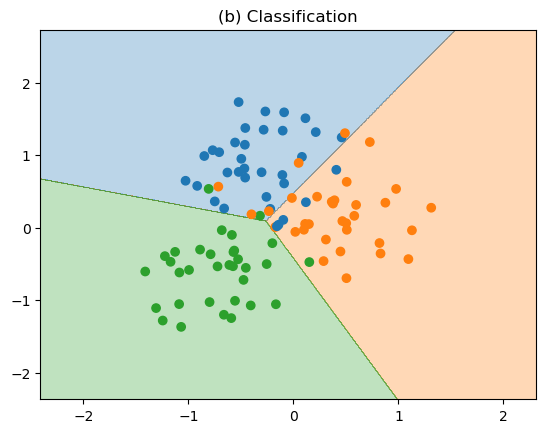

In [10]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X=x_cluster, response_method="predict", alpha=0.3, cmap=custom_cmap, grid_resolution=1000
)
plt.scatter(x_cluster[:, 0], x_cluster[:, 1], c=y_cluster, cmap=custom_cmap)
plt.title('(b) Classification')

# Total

In [11]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(6.30045, 3.5))
plt.subplots_adjust(wspace=0.4, hspace=0.01)
plt.tight_layout()

ax[0].scatter(x_data, y_data, label='Noisy data', s=8)
ax[0].plot(x_fit, y_fit, color='red', linestyle='--', label='Fitted curve')
ax[0].set_title('(a) Regression')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].set_box_aspect(1)

disp = DecisionBoundaryDisplay.from_estimator(
    clf, X=x_cluster, response_method="predict", alpha=0.3, cmap=custom_cmap, grid_resolution=1000, ax=ax[1]
)
ax[1].scatter(x_cluster[:, 0], x_cluster[:, 1], c=y_cluster, cmap=custom_cmap, s=8)
ax[1].set_title('(b) Classification')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_box_aspect(1)

plt.savefig('plot.pdf')
plt.savefig('plot.pgf')